<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Questions</a></span></li><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dependencies</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Encoding-Variables" data-toc-modified-id="Encoding-Variables-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Encoding Variables</a></span><ul class="toc-item"><li><span><a href="#One-Hot-Encoding" data-toc-modified-id="One-Hot-Encoding-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>One-Hot Encoding</a></span></li><li><span><a href="#Ordinal-Encoding" data-toc-modified-id="Ordinal-Encoding-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Ordinal Encoding</a></span></li><li><span><a href="#Creating-encoded-dataset" data-toc-modified-id="Creating-encoded-dataset-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Creating encoded dataset</a></span></li></ul></li><li><span><a href="#Imputing-Missing-Values" data-toc-modified-id="Imputing-Missing-Values-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Imputing Missing Values</a></span><ul class="toc-item"><li><span><a href="#Univariate-feature-imputation-(Static-imputation)" data-toc-modified-id="Univariate-feature-imputation-(Static-imputation)-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Univariate feature imputation (Static imputation)</a></span></li><li><span><a href="#KNN-imputation" data-toc-modified-id="KNN-imputation-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>KNN imputation</a></span></li></ul></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Feature Scaling</a></span><ul class="toc-item"><li><span><a href="#MinMax-scaling" data-toc-modified-id="MinMax-scaling-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>MinMax scaling</a></span></li><li><span><a href="#Standard-scaling" data-toc-modified-id="Standard-scaling-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>Standard scaling</a></span></li><li><span><a href="#Robust-scaling" data-toc-modified-id="Robust-scaling-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>Robust scaling</a></span></li></ul></li><li><span><a href="#Outlier-Removal-expliquer-pourquoi-on-ne-le-fait-pas" data-toc-modified-id="Outlier-Removal-expliquer-pourquoi-on-ne-le-fait-pas-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Outlier Removal expliquer pourquoi on ne le fait pas</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>PCA</a></span></li></ul></li></ul></div>

# Questions 

- nature of missing values? voir sur kaggle (peut-être suppr délai à l'arrivée) -> problème résolu avec features selection
- outliers removal of features selection first ? -> features selection first to explain why there is no outliers removal

# Dependencies

In [1]:
!pip install numpy==1.22.4
!pip install matplotlib==3.7.1
!pip install mglearn==0.2.0
!pip install pandas==2.0.3
!pip install scikit-learn==1.3.2
!pip install seaborn==0.13.1

In [2]:
!pip freeze

absl-py==2.0.0
ale-py==0.8.1
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru==2.0.4
attrs==23.1.0
AutoROM==0.6.1
AutoROM.accept-rom-license==0.6.1
Babel==2.13.1
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4==4.12.2
bleach==6.1.0
Box2D==2.3.10
cachetools==5.3.2
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
click==8.1.7
cloudpickle==3.0.0
comm==0.2.0
contourpy==1.1.1
cycler==0.12.1
Cython==0.29.35
debugpy==1.8.0
decorator @ file:///opt/conda/conda-bld/decorator_1643638310831/work
defusedxml==0.7.1
dill==0.3.7
easyocr==1.7.1
entrypoints==0.4
exceptiongroup==1.2.0
executing @ file:///opt/conda/conda-bld/executing_1646925071911/work
experiment-utilities==0.3.6
Farama-Notifications==0.0.4
fasteners==0.19
fastjsonschema==2.19.0
filelock==3.13.1
fonttools==4.45.1
fqdn==1.5.1
fsspec==2023.12.1
glfw==2.7.0
google-auth==2.23.4
google-auth-oauthl

# Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("airline_satisfaction.csv")

In [5]:
#target
y = df.satisfaction.values

#storing the values of the features in 3 variables: categorical, quantitative and ordinal
categorical_variables = ['Gender','Customer Type','Type of Travel','Class']

quantitative_variables = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

ordinal_variables = ['Inflight wifi service', 'Departure/Arrival time convenient','Ease of Online booking', 
                     'Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment',
                     'On-board service','Leg room service','Baggage handling','Checkin service','Inflight service',
                     'Cleanliness']

X = df[categorical_variables + quantitative_variables + ordinal_variables].values
X_quantitative = df[quantitative_variables].values
X_categorical = df[categorical_variables].values
X_ordinal = df[ordinal_variables].values

In [6]:
#display the 5 first rows of our dataframe
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Preprocessing

## Encoding Variables

### One-Hot Encoding
for categorical variables

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
one_hot_encoder = OneHotEncoder()

In [9]:
one_hot_encoder.fit(X_categorical)
one_hot_encoded_X = one_hot_encoder.transform(X_categorical)

In [10]:
one_hot_encoded_X.toarray()

array([[0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

In [11]:
one_hot_encoder.get_feature_names_out()

array(['x0_Female', 'x0_Male', 'x1_Loyal Customer',
       'x1_disloyal Customer', 'x2_Business travel', 'x2_Personal Travel',
       'x3_Business', 'x3_Eco', 'x3_Eco Plus'], dtype=object)

In [12]:
one_hot_encoded_X

<129880x9 sparse matrix of type '<class 'numpy.float64'>'
	with 519520 stored elements in Compressed Sparse Row format>

In [13]:
df_categorical=df[categorical_variables]

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)

print("Number of new columns generated after one-hot encoding:", df_encoded.shape[1] - df.shape[1])

Number of new columns generated after one-hot encoding: 6


In [15]:
X_categorical_encoded = pd.concat([df_categorical, df_encoded], axis=1)

In [16]:
#display the categorical features, not encoded and encoded
X_categorical_encoded

,Gender,Customer Type,Type of Travel,Class,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,Male,Loyal Customer,Personal Travel,Eco Plus,0,70172,13,460,3,4,...,True,True,False,False,True,False,False,True,True,False
1,Male,disloyal Customer,Business travel,Business,1,5047,25,235,3,2,...,True,False,True,True,False,True,False,False,True,False
2,Female,Loyal Customer,Business travel,Business,2,110028,26,1142,2,2,...,False,True,False,True,False,True,False,False,False,True
3,Female,Loyal Customer,Business travel,Business,3,24026,25,562,2,5,...,False,True,False,True,False,True,False,False,True,False
4,Male,Loyal Customer,Business travel,Business,4,119299,61,214,3,3,...,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,Male,disloyal Customer,Business travel,Business,25971,78463,34,526,3,3,...,True,False,True,True,False,True,False,False,True,False
129876,Male,Loyal Customer,Business travel,Business,25972,71167,23,646,4,4,...,True,True,False,True,False,True,False,False,False,True
129877,Female,Loyal Customer,Personal Travel,Eco,25973,37675,17,828,2,5,...,False,True,False,False,True,False,True,False,True,False
129878,Male,Loyal Customer,Business travel,Business,25974,90086,14,1127,3,3,...,True,True,False,True,False,True,False,False,False,True


### Ordinal Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()

In [19]:
X_ordinal_encoded = np.zeros_like(X_ordinal)

In [20]:
for i in range(X_ordinal.shape[1]):
    X_ordinal_encoded[:, i] = label_encoder.fit_transform(X_ordinal[:, i])

In [21]:
for i, col in enumerate(ordinal_variables):
    print(f"===== Encoded classes for {col}: {label_encoder.classes_}")

===== Encoded classes for Inflight wifi service: [0 1 2 3 4 5]
===== Encoded classes for Departure/Arrival time convenient: [0 1 2 3 4 5]
===== Encoded classes for Ease of Online booking: [0 1 2 3 4 5]
===== Encoded classes for Gate location: [0 1 2 3 4 5]
===== Encoded classes for Food and drink: [0 1 2 3 4 5]
===== Encoded classes for Online boarding: [0 1 2 3 4 5]
===== Encoded classes for Seat comfort: [0 1 2 3 4 5]
===== Encoded classes for Inflight entertainment: [0 1 2 3 4 5]
===== Encoded classes for On-board service: [0 1 2 3 4 5]
===== Encoded classes for Leg room service: [0 1 2 3 4 5]
===== Encoded classes for Baggage handling: [0 1 2 3 4 5]
===== Encoded classes for Checkin service: [0 1 2 3 4 5]
===== Encoded classes for Inflight service: [0 1 2 3 4 5]
===== Encoded classes for Cleanliness: [0 1 2 3 4 5]


In [22]:
X_ordinal_encoded

array([[3, 4, 3, ..., 4, 5, 5],
       [3, 2, 3, ..., 1, 4, 1],
       [2, 2, 2, ..., 4, 4, 5],
       ...,
       [2, 5, 1, ..., 5, 4, 2],
       [3, 3, 3, ..., 4, 5, 4],
       [2, 5, 2, ..., 1, 1, 1]])

In [23]:
#i was checking if the size is the same
X_ordinal_encoded.shape

(129880, 14)

In [24]:
X_ordinal.shape

(129880, 14)

### Creating encoded dataset

In [25]:
df_quantitative = pd.DataFrame(X_quantitative, columns=['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes'])

In [26]:
#display a datafram which contains the quantitative variables
df_quantitative

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13.0,460.0,25.0,18.0
1,25.0,235.0,1.0,6.0
2,26.0,1142.0,0.0,0.0
3,25.0,562.0,11.0,9.0
4,61.0,214.0,0.0,0.0
...,...,...,...,...
129875,34.0,526.0,0.0,0.0
129876,23.0,646.0,0.0,0.0
129877,17.0,828.0,0.0,0.0
129878,14.0,1127.0,0.0,0.0


In [27]:
df_categorical_encoded = pd.DataFrame(X_categorical_encoded, columns=['Gender_Male','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied'])

In [28]:
#display a datafram which contains the categorical encoded variables
df_categorical_encoded

,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
0,True,True,False,False,True,False,False,True,True,False
1,True,False,True,True,False,True,False,False,True,False
2,False,True,False,True,False,True,False,False,False,True
3,False,True,False,True,False,True,False,False,True,False
4,True,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
129875,True,False,True,True,False,True,False,False,True,False
129876,True,True,False,True,False,True,False,False,False,True
129877,False,True,False,False,True,False,True,False,True,False
129878,True,True,False,True,False,True,False,False,False,True


In [29]:
df_ordinal_encoded = pd.DataFrame(X_ordinal_encoded, columns=['Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'])

In [30]:
#display a datafram which contains the ordinal encoded variables
df_ordinal_encoded

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,3,4,5,5
1,3,2,3,3,1,3,1,1,1,5,2,1,4,1
2,2,2,2,2,5,5,5,5,4,3,3,4,4,5
3,2,5,5,5,2,2,2,2,2,5,2,1,4,2
4,3,3,3,3,4,5,5,3,3,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,3,3,3,1,4,3,4,4,3,2,3,4,5,4
129876,4,4,4,4,4,4,4,4,4,5,4,5,5,4
129877,2,5,1,5,2,1,2,2,4,3,3,5,4,2
129878,3,3,3,3,4,4,4,4,3,2,4,4,5,4


In [31]:
df_encoded = pd.concat([df_quantitative, df_categorical_encoded, df_ordinal_encoded], axis=1)

In [32]:
#display the whole dataframe
print(df_encoded)

         Age  Flight Distance  Departure Delay in Minutes  \
0       13.0            460.0                        25.0   
1       25.0            235.0                         1.0   
2       26.0           1142.0                         0.0   
3       25.0            562.0                        11.0   
4       61.0            214.0                         0.0   
...      ...              ...                         ...   
129875  34.0            526.0                         0.0   
129876  23.0            646.0                         0.0   
129877  17.0            828.0                         0.0   
129878  14.0           1127.0                         0.0   
129879  42.0            264.0                         0.0   

        Arrival Delay in Minutes  Gender_Male  Customer Type_Loyal Customer  \
0                           18.0         True                          True   
1                            6.0         True                         False   
2                            0

In [33]:
#df_encoded.to_csv('/home/estelle/robotlearn/airline_satisfaction/airline_satisfaction_encoded.csv')

## Imputing Missing Values

In [34]:
nan_counts = df_encoded.isna().sum()

In [35]:
print(nan_counts)

Age                                       0
Flight Distance                           0
Departure Delay in Minutes                0
Arrival Delay in Minutes                393
Gender_Male                               0
Customer Type_Loyal Customer              0
Customer Type_disloyal Customer           0
Type of Travel_Business travel            0
Type of Travel_Personal Travel            0
Class_Business                            0
Class_Eco                                 0
Class_Eco Plus                            0
satisfaction_neutral or dissatisfied      0
satisfaction_satisfied                    0
Inflight wifi service                     0
Departure/Arrival time convenient         0
Ease of Online booking                    0
Gate location                             0
Food and drink                            0
Online boarding                           0
Seat comfort                              0
Inflight entertainment                    0
On-board service                

we notice that there are 393 missing values for the "Arrival Delay in Minutes" feature

### Univariate feature imputation (Static imputation)

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
X_encoded = df_encoded.values

In [38]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_encoded)

X_imputed = simple_imputer.transform(X_encoded)

In [39]:
print(X_imputed)

[[1.300e+01 4.600e+02 2.500e+01 ... 4.000e+00 5.000e+00 5.000e+00]
 [2.500e+01 2.350e+02 1.000e+00 ... 1.000e+00 4.000e+00 1.000e+00]
 [2.600e+01 1.142e+03 0.000e+00 ... 4.000e+00 4.000e+00 5.000e+00]
 ...
 [1.700e+01 8.280e+02 0.000e+00 ... 5.000e+00 4.000e+00 2.000e+00]
 [1.400e+01 1.127e+03 0.000e+00 ... 4.000e+00 5.000e+00 4.000e+00]
 [4.200e+01 2.640e+02 0.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]]


mean strategy : OK for quantitative var, but not for categorical var or ordinal var...

In [40]:
simple_imputer = SimpleImputer(strategy="mean")
simple_imputer.fit(X_quantitative)

X_imputed = simple_imputer.transform(X_quantitative)

In [41]:
X_imputed

array([[1.300e+01, 4.600e+02, 2.500e+01, 1.800e+01],
       [2.500e+01, 2.350e+02, 1.000e+00, 6.000e+00],
       [2.600e+01, 1.142e+03, 0.000e+00, 0.000e+00],
       ...,
       [1.700e+01, 8.280e+02, 0.000e+00, 0.000e+00],
       [1.400e+01, 1.127e+03, 0.000e+00, 0.000e+00],
       [4.200e+01, 2.640e+02, 0.000e+00, 0.000e+00]])

most frequent strategy for categorical var ?
- not working with X_categorical_encoded  
-> encoding after imputing missing values ?

In [42]:
simple_imputer = SimpleImputer(strategy="most_frequent")
simple_imputer.fit(X_categorical)

X_imputed = simple_imputer.transform(X_categorical)

In [43]:
X_imputed

array([['Male', 'Loyal Customer', 'Personal Travel', 'Eco Plus'],
       ['Male', 'disloyal Customer', 'Business travel', 'Business'],
       ['Female', 'Loyal Customer', 'Business travel', 'Business'],
       ...,
       ['Female', 'Loyal Customer', 'Personal Travel', 'Eco'],
       ['Male', 'Loyal Customer', 'Business travel', 'Business'],
       ['Female', 'Loyal Customer', 'Personal Travel', 'Eco']],
      dtype=object)

### KNN imputation

In [44]:
from sklearn.impute import KNNImputer

In [45]:
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
knn_imputer.fit(X_encoded)

X_imputed = knn_imputer.transform(X_encoded)

In [46]:
X_imputed

array([[1.300e+01, 4.600e+02, 2.500e+01, ..., 4.000e+00, 5.000e+00,
        5.000e+00],
       [2.500e+01, 2.350e+02, 1.000e+00, ..., 1.000e+00, 4.000e+00,
        1.000e+00],
       [2.600e+01, 1.142e+03, 0.000e+00, ..., 4.000e+00, 4.000e+00,
        5.000e+00],
       ...,
       [1.700e+01, 8.280e+02, 0.000e+00, ..., 5.000e+00, 4.000e+00,
        2.000e+00],
       [1.400e+01, 1.127e+03, 0.000e+00, ..., 4.000e+00, 5.000e+00,
        4.000e+00],
       [4.200e+01, 2.640e+02, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [47]:
X_imputed.shape

(129880, 28)

KNN imputation seems to be working with all variables

saving best imputation strategy in a df and new csv

In [48]:
df_imputed = pd.DataFrame(X_imputed, columns = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'Gender_Male','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied', 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'])

In [49]:
nan_counts = df_imputed.isna().sum()

In [50]:
#we verify there are no longer missing values

print(nan_counts)

Age                                     0
Flight Distance                         0
Departure Delay in Minutes              0
Arrival Delay in Minutes                0
Gender_Male                             0
Customer Type_Loyal Customer            0
Customer Type_disloyal Customer         0
Type of Travel_Business travel          0
Type of Travel_Personal Travel          0
Class_Business                          0
Class_Eco                               0
Class_Eco Plus                          0
satisfaction_neutral or dissatisfied    0
satisfaction_satisfied                  0
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                            0
Inflight entertainment                  0
On-board service                        0
Leg room service                  

In [51]:
#display the dataframe which contains all features with no missing values
df_imputed

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,13.0,460.0,25.0,18.0,1.0,1.0,0.0,0.0,1.0,0.0,...,5.0,3.0,5.0,5.0,4.0,3.0,3.0,4.0,5.0,5.0
1,25.0,235.0,1.0,6.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,3.0,1.0,1.0,1.0,5.0,2.0,1.0,4.0,1.0
2,26.0,1142.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,5.0,5.0,5.0,5.0,4.0,3.0,3.0,4.0,4.0,5.0
3,25.0,562.0,11.0,9.0,0.0,1.0,0.0,1.0,0.0,1.0,...,2.0,2.0,2.0,2.0,2.0,5.0,2.0,1.0,4.0,2.0
4,61.0,214.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,4.0,5.0,5.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,34.0,526.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,4.0,3.0,4.0,4.0,3.0,2.0,3.0,4.0,5.0,4.0
129876,23.0,646.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,4.0,4.0,4.0,4.0,4.0,5.0,4.0,5.0,5.0,4.0
129877,17.0,828.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,1.0,2.0,2.0,4.0,3.0,3.0,5.0,4.0,2.0
129878,14.0,1127.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,4.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,5.0,4.0


In [52]:
#df_imputed.to_csv('/home/estelle/robotlearn/airline_satisfaction/airline_satisfaction_imputed.csv')

## Feature Scaling

### MinMax scaling

In [53]:
from sklearn.preprocessing import MinMaxScaler

In [54]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_imputed)

X_scaled = minmax_scaler.transform(X_imputed)

In [55]:
X_scaled

array([[7.69230769e-02, 8.66316640e-02, 1.57035176e-02, ...,
        8.00000000e-01, 1.00000000e+00, 1.00000000e+00],
       [2.30769231e-01, 4.11954766e-02, 6.28140704e-04, ...,
        2.00000000e-01, 8.00000000e-01, 2.00000000e-01],
       [2.43589744e-01, 2.24353796e-01, 0.00000000e+00, ...,
        8.00000000e-01, 8.00000000e-01, 1.00000000e+00],
       ...,
       [1.28205128e-01, 1.60945073e-01, 0.00000000e+00, ...,
        1.00000000e+00, 8.00000000e-01, 4.00000000e-01],
       [8.97435897e-02, 2.21324717e-01, 0.00000000e+00, ...,
        8.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       [4.48717949e-01, 4.70516963e-02, 0.00000000e+00, ...,
        2.00000000e-01, 2.00000000e-01, 2.00000000e-01]])

In [56]:
df_scaled = pd.DataFrame(X_scaled, columns = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'Gender_Male','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied', 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'])

In [57]:
df_scaled

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.076923,0.086632,0.015704,0.011364,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0
1,0.230769,0.041195,0.000628,0.003788,1.0,0.0,1.0,1.0,0.0,1.0,...,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2
2,0.243590,0.224354,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0
3,0.230769,0.107229,0.006910,0.005682,0.0,1.0,0.0,1.0,0.0,1.0,...,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4
4,0.692308,0.036955,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.346154,0.099960,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,...,0.8,0.6,0.8,0.8,0.6,0.4,0.75,0.8,1.0,0.8
129876,0.205128,0.124192,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,0.8,0.8,0.8,0.8,1.0,1.00,1.0,1.0,0.8
129877,0.128205,0.160945,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.4,0.2,0.4,0.4,0.8,0.6,0.75,1.0,0.8,0.4
129878,0.089744,0.221325,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,0.8,0.8,0.8,0.6,0.4,1.00,0.8,1.0,0.8


### Standard scaling

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_imputed)

X_scaled = standard_scaler.transform(X_imputed)

In [60]:
X_scaled

array([[7.69230769e-02, 8.66316640e-02, 1.57035176e-02, ...,
        8.00000000e-01, 1.00000000e+00, 1.00000000e+00],
       [2.30769231e-01, 4.11954766e-02, 6.28140704e-04, ...,
        2.00000000e-01, 8.00000000e-01, 2.00000000e-01],
       [2.43589744e-01, 2.24353796e-01, 0.00000000e+00, ...,
        8.00000000e-01, 8.00000000e-01, 1.00000000e+00],
       ...,
       [1.28205128e-01, 1.60945073e-01, 0.00000000e+00, ...,
        1.00000000e+00, 8.00000000e-01, 4.00000000e-01],
       [8.97435897e-02, 2.21324717e-01, 0.00000000e+00, ...,
        8.00000000e-01, 1.00000000e+00, 8.00000000e-01],
       [4.48717949e-01, 4.70516963e-02, 0.00000000e+00, ...,
        2.00000000e-01, 2.00000000e-01, 2.00000000e-01]])

In [61]:
df_scaled = pd.DataFrame(X_scaled, columns = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'Gender_Male','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied', 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'])

In [62]:
df_scaled

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,0.076923,0.086632,0.015704,0.011364,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0
1,0.230769,0.041195,0.000628,0.003788,1.0,0.0,1.0,1.0,0.0,1.0,...,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2
2,0.243590,0.224354,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0
3,0.230769,0.107229,0.006910,0.005682,0.0,1.0,0.0,1.0,0.0,1.0,...,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4
4,0.692308,0.036955,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,0.346154,0.099960,0.000000,0.000000,1.0,0.0,1.0,1.0,0.0,1.0,...,0.8,0.6,0.8,0.8,0.6,0.4,0.75,0.8,1.0,0.8
129876,0.205128,0.124192,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,0.8,0.8,0.8,0.8,1.0,1.00,1.0,1.0,0.8
129877,0.128205,0.160945,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,0.0,...,0.4,0.2,0.4,0.4,0.8,0.6,0.75,1.0,0.8,0.4
129878,0.089744,0.221325,0.000000,0.000000,1.0,1.0,0.0,1.0,0.0,1.0,...,0.8,0.8,0.8,0.8,0.6,0.4,1.00,0.8,1.0,0.8


### Robust scaling

In [63]:
#from sklearn.preprocessing import RobustScaler

In [64]:
#robust_scaler = RobustScaler()
#robust_scaler.fit(X_imputed)

#X_scaled = robust_scaler.transform(X_imputed)

In [65]:
#X_scaled

In [66]:
#df_scaled = pd.DataFrame(X_scaled, columns = ['Age','Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes', 'Gender_Male','Customer Type_Loyal Customer', 'Customer Type_disloyal Customer', 'Type of Travel_Business travel', 'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'satisfaction_neutral or dissatisfied', 'satisfaction_satisfied', 'Inflight wifi service','Departure/Arrival time convenient','Ease of Online booking','Gate location','Food and drink','Online boarding','Seat comfort','Inflight entertainment','On-board service','Leg room service','Baggage handling','Checkin service','Inflight service','Cleanliness'])

In [67]:
#df_scaled

**It seems that min max scaling and standard sccaling are working well**

## Outlier Removal expliquer pourquoi on ne le fait pas

In [68]:
for i, col in enumerate(df_scaled.columns):
    print(col)

Age
Flight Distance
Departure Delay in Minutes
Arrival Delay in Minutes
Gender_Male
Customer Type_Loyal Customer
Customer Type_disloyal Customer
Type of Travel_Business travel
Type of Travel_Personal Travel
Class_Business
Class_Eco
Class_Eco Plus
satisfaction_neutral or dissatisfied
satisfaction_satisfied
Inflight wifi service
Departure/Arrival time convenient
Ease of Online booking
Gate location
Food and drink
Online boarding
Seat comfort
Inflight entertainment
On-board service
Leg room service
Baggage handling
Checkin service
Inflight service
Cleanliness


In [69]:
df_quantitative_scaled = pd.DataFrame(df_scaled.copy(),columns=['Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'])
#df_quantitative_scaled = df_scaled.copy()

#'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'

In [70]:
df_quantitative_scaled

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.086632,0.015704,0.011364
1,0.041195,0.000628,0.003788
2,0.224354,0.000000,0.000000
3,0.107229,0.006910,0.005682
4,0.036955,0.000000,0.000000
...,...,...,...
129875,0.099960,0.000000,0.000000
129876,0.124192,0.000000,0.000000
129877,0.160945,0.000000,0.000000
129878,0.221325,0.000000,0.000000


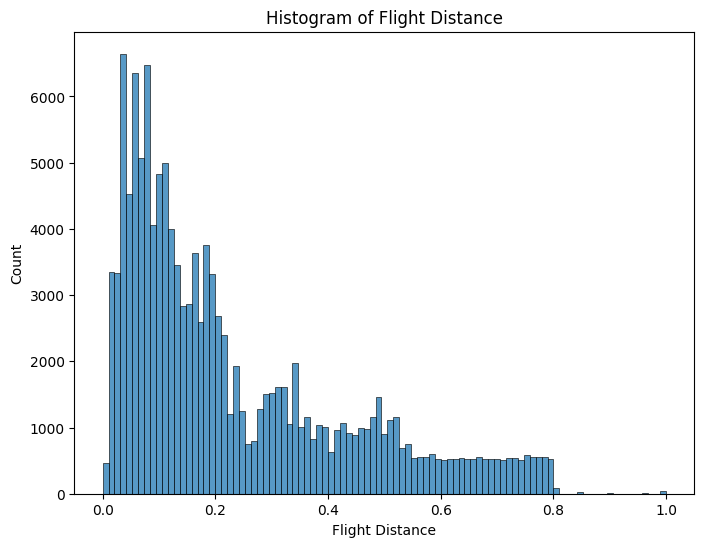

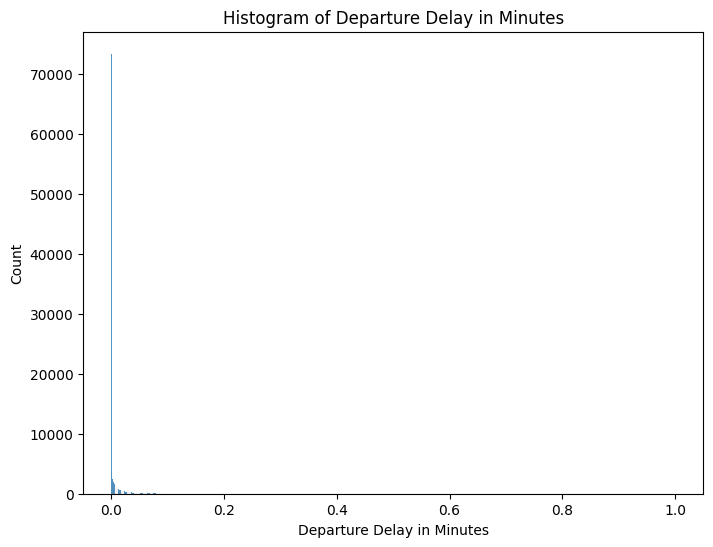

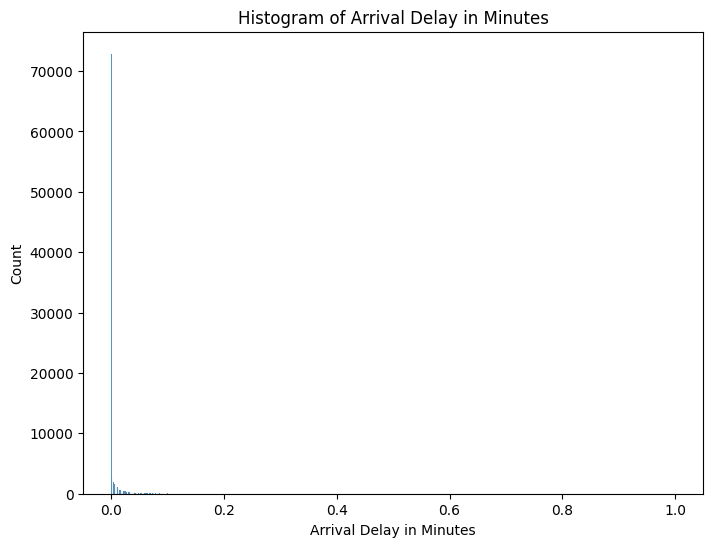

In [71]:
for i, col in enumerate(df_quantitative_scaled.columns):
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    sns.histplot(data=df_quantitative_scaled, x=col)
    plt.title(f'Histogram of {col}')
    plt.show()

In [72]:
df_scaled.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.415743,0.234111,0.009242,0.009568,0.492616,0.816908,0.183092,0.690584,0.309416,0.478596,...,0.640955,0.650527,0.688272,0.671615,0.676605,0.670176,0.658029,0.661253,0.728439,0.657265
std,0.193838,0.201424,0.023914,0.024360,0.499947,0.386743,0.386743,0.462255,0.462255,0.499544,...,0.265987,0.270144,0.263858,0.266810,0.257420,0.263250,0.295006,0.253237,0.235334,0.262736
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256410,0.077342,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.500000,0.600000,0.600000,0.400000
50%,0.423077,0.164176,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.600000,0.600000,0.800000,0.800000,0.800000,0.800000,0.750000,0.600000,0.800000,0.600000
75%,0.564103,0.345921,0.007538,0.008207,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.800000,0.800000,1.000000,0.800000,0.800000,0.800000,1.000000,0.800000,1.000000,0.800000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
max_flight_distance = df_quantitative['Flight Distance'].max()
print("Maximum Flight Distance:", max_flight_distance)

Maximum Flight Distance: 4983.0


In [74]:
df_scaled.quantile(0.25)

Age                                     0.256410
Flight Distance                         0.077342
Departure Delay in Minutes              0.000000
Arrival Delay in Minutes                0.000000
Gender_Male                             0.000000
Customer Type_Loyal Customer            1.000000
Customer Type_disloyal Customer         0.000000
Type of Travel_Business travel          0.000000
Type of Travel_Personal Travel          0.000000
Class_Business                          0.000000
Class_Eco                               0.000000
Class_Eco Plus                          0.000000
satisfaction_neutral or dissatisfied    0.000000
satisfaction_satisfied                  0.000000
Inflight wifi service                   0.400000
Departure/Arrival time convenient       0.400000
Ease of Online booking                  0.400000
Gate location                           0.400000
Food and drink                          0.400000
Online boarding                         0.400000
Seat comfort        

In [75]:
threshold=df_scaled['Flight Distance'].quantile(0.75)+(df_scaled['Flight Distance'].quantile(0.75)-df_scaled['Flight Distance'].quantile(0.25))*1.5

In [76]:
threshold

0.7487883683360259

In [77]:
def outlier_removal(column):
    
    threshold=df_quantitative_scaled[column].quantile(0.75)+(df_quantitative_scaled[column].quantile(0.75)-df_quantitative_scaled[column].quantile(0.25))*1.5
    
    sns.boxplot(df_quantitative_scaled[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()
    
    outliers = df_quantitative_scaled[df_quantitative_scaled[column] <= threshold]
    removed_outliers = df_quantitative_scaled.drop(outliers.index)
    
    sns.boxplot(outliers[column])
    
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    
    return removed_outliers

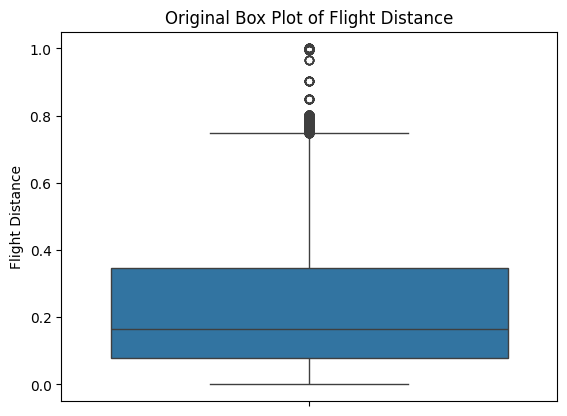

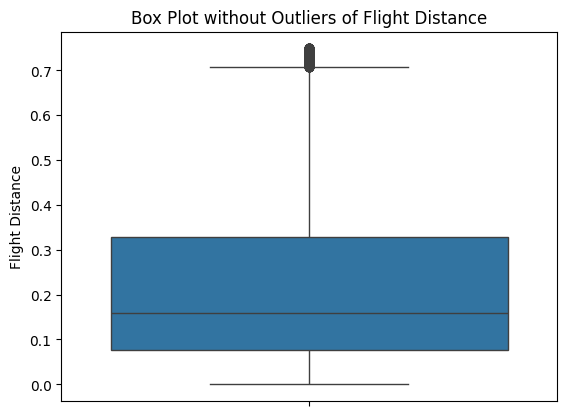

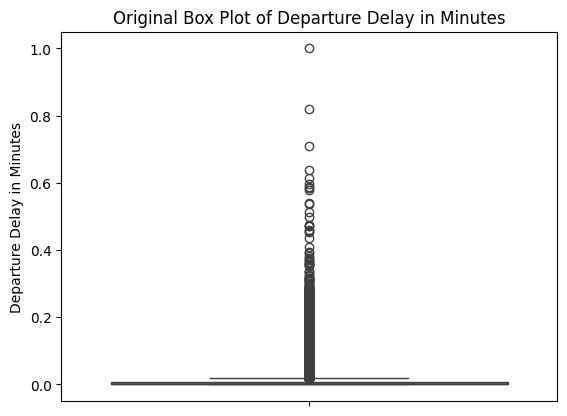

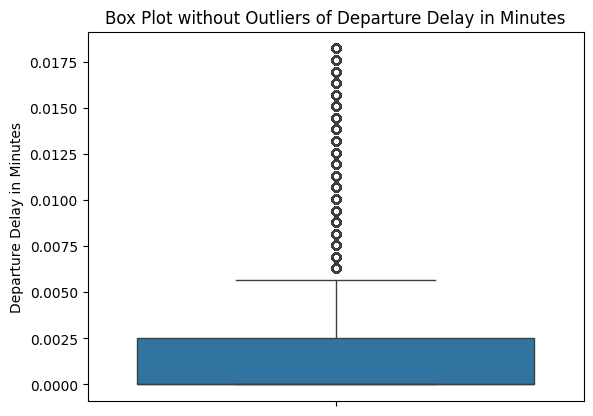

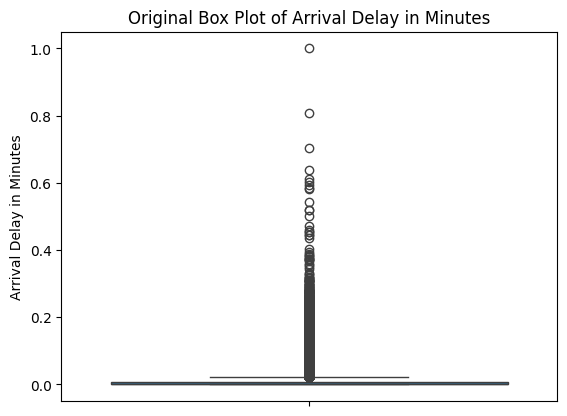

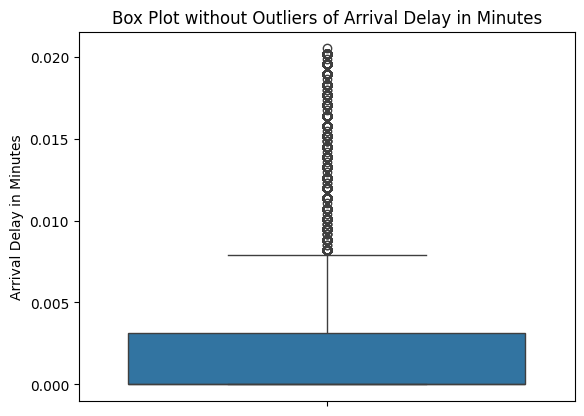

In [78]:
for i, col in enumerate(df_quantitative_scaled):
    df_outlier_removal = outlier_removal(col)

In [79]:
df_quantitative.shape

(129880, 4)

In [80]:
df_quantitative.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,13.0,460.0,25.0,18.0
1,25.0,235.0,1.0,6.0
2,26.0,1142.0,0.0,0.0
3,25.0,562.0,11.0,9.0
4,61.0,214.0,0.0,0.0


In [81]:
df_quantitative_scaled.shape

(129880, 3)

In [82]:
df_quantitative_scaled.isna().sum()

Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [83]:
df_quantitative_scaled.head()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.086632,0.015704,0.011364
1,0.041195,0.000628,0.003788
2,0.224354,0.000000,0.000000
3,0.107229,0.006910,0.005682
4,0.036955,0.000000,0.000000


In [84]:
df_outlier_removal.shape

(17609, 3)

In [85]:
df_outlier_removal.head()

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
14,0.085218,0.027010,0.022096
16,0.422456,0.030779,0.032197
24,0.085016,0.033920,0.027778
32,0.521002,0.068467,0.075758
55,0.667003,0.032035,0.030303


In [86]:
df_outlier_removal.isna().sum()

Flight Distance               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

## Feature Selection

In [87]:
correlation_matrix = df_scaled.corr()
correlation_matrix

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Age,1.000000,0.099459,-0.009041,-0.011076,0.008996,0.284172,-0.284172,0.044808,-0.044808,0.138731,...,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565
Flight Distance,0.099459,1.000000,0.002402,-0.001585,0.003616,0.226021,-0.226021,0.266792,-0.266792,0.466594,...,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648
Departure Delay in Minutes,-0.009041,0.002402,1.000000,0.965506,0.003491,-0.003859,0.003859,0.005913,-0.005913,-0.010296,...,-0.029164,-0.019404,-0.027999,-0.027012,-0.030486,0.014574,-0.004105,-0.018752,-0.054432,-0.014543
Arrival Delay in Minutes,-0.011076,-0.001585,0.965506,1.000000,0.001673,-0.004465,0.004465,0.005389,-0.005389,-0.014915,...,-0.031583,-0.022842,-0.030875,-0.030096,-0.034794,0.011568,-0.007614,-0.021873,-0.059927,-0.016590
Gender_Male,0.008996,0.003616,0.003491,0.001673,1.000000,0.030958,-0.030958,-0.009503,0.009503,0.008508,...,0.001730,-0.045022,-0.030756,0.003843,0.006447,0.031047,0.036356,0.008462,0.038504,0.002867
Customer Type_Loyal Customer,0.284172,0.226021,-0.003859,-0.004465,0.030958,1.000000,-1.000000,-0.308236,0.308236,0.085685,...,0.056997,0.189083,0.156239,0.106001,0.054172,0.046841,-0.024874,0.031243,-0.023292,0.081302
Customer Type_disloyal Customer,-0.284172,-0.226021,0.003859,0.004465,-0.030958,-1.000000,1.000000,0.308236,-0.308236,-0.085685,...,-0.056997,-0.189083,-0.156239,-0.106001,-0.054172,-0.046841,0.024874,-0.031243,0.023292,-0.081302
Type of Travel_Business travel,0.044808,0.266792,0.005913,0.005389,-0.009503,-0.308236,0.308236,1.000000,-1.000000,0.552173,...,0.068986,0.224020,0.127717,0.152936,0.059794,0.139612,0.033012,-0.016247,0.023538,0.084615
Type of Travel_Personal Travel,-0.044808,-0.266792,-0.005913,-0.005389,0.009503,0.308236,-0.308236,-1.000000,1.000000,-0.552173,...,-0.068986,-0.224020,-0.127717,-0.152936,-0.059794,-0.139612,-0.033012,0.016247,-0.023538,-0.084615
Class_Business,0.138731,0.466594,-0.010296,-0.014915,0.008508,0.085685,-0.085685,0.552173,-0.552173,1.000000,...,0.090180,0.330819,0.234089,0.202002,0.222942,0.214844,0.172724,0.162488,0.166163,0.142704


In [88]:
#correlation_matrix = correlation_matrix[correlation_matrix > 0.5]
#correlation_matrix

In [89]:
correlation_pairs = (correlation_matrix.stack()
                     .loc[lambda x: (x > 0.8) | (x < -0.8)]
                     .reset_index()
                     .rename(columns={'level_0': 'Feature 1', 'level_1': 'Feature 2', 0: 'Correlation'}))

correlation_pairs['Sorted Features'] = correlation_pairs.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
correlation_pairs = correlation_pairs.drop_duplicates(subset=['Sorted Features'])
correlation_pairs.drop(columns=['Sorted Features'], inplace=True)

In [90]:
correlation_pairs

,Feature 1,Feature 2,Correlation
0,Age,Age,1.000000
1,Flight Distance,Flight Distance,1.000000
2,Departure Delay in Minutes,Departure Delay in Minutes,1.000000
3,Departure Delay in Minutes,Arrival Delay in Minutes,0.965506
5,Arrival Delay in Minutes,Arrival Delay in Minutes,1.000000
6,Gender_Male,Gender_Male,1.000000
7,Customer Type_Loyal Customer,Customer Type_Loyal Customer,1.000000
8,Customer Type_Loyal Customer,Customer Type_disloyal Customer,-1.000000
10,Customer Type_disloyal Customer,Customer Type_disloyal Customer,1.000000
11,Type of Travel_Business travel,Type of Travel_Business travel,1.000000


In [91]:
unique_features = set(correlation_pairs['Feature 1']).union(set(correlation_pairs['Feature 2']))
num_unique_features = len(unique_features)

print(f"correlated features :{unique_features} \n\n {num_unique_features} correlated features on total of {len(df_scaled.columns)} features")

correlated features :{'Checkin service', 'Online boarding', 'Class_Eco', 'satisfaction_neutral or dissatisfied', 'Gate location', 'Customer Type_Loyal Customer', 'Seat comfort', 'Inflight entertainment', 'Arrival Delay in Minutes', 'Baggage handling', 'On-board service', 'Inflight wifi service', 'Ease of Online booking', 'satisfaction_satisfied', 'Inflight service', 'Customer Type_disloyal Customer', 'Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Flight Distance', 'Age', 'Class_Eco Plus', 'Cleanliness', 'Gender_Male', 'Class_Business', 'Type of Travel_Personal Travel', 'Leg room service', 'Type of Travel_Business travel'} 

 28 correlated features on total of 28 features


<Axes: >

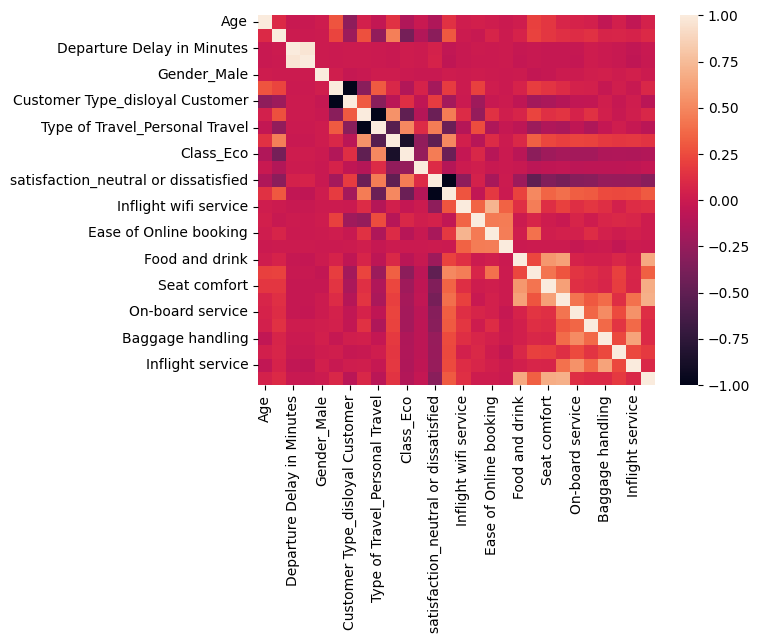

In [92]:
sns.heatmap(
    df_scaled.corr(),
)

In [93]:
df_final = df_scaled.drop(columns = ['Arrival Delay in Minutes','Customer Type_disloyal Customer','Type of Travel_Personal Travel','Class_Eco','satisfaction_neutral or dissatisfied']).copy()

In [94]:
df_final.corr()

,Age,Flight Distance,Departure Delay in Minutes,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco Plus,satisfaction_satisfied,Inflight wifi service,...,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
Age,1.000000,0.099459,-0.009041,0.008996,0.284172,0.044808,0.138731,-0.012922,0.134091,0.016116,...,0.023194,0.207572,0.159136,0.074947,0.057078,0.039119,-0.047991,0.033475,-0.051347,0.052565
Flight Distance,0.099459,1.000000,0.002402,0.003616,0.226021,0.266792,0.466594,-0.124198,0.298085,0.006701,...,0.057066,0.214825,0.157662,0.130507,0.111194,0.134533,0.064855,0.073608,0.059316,0.095648
Departure Delay in Minutes,-0.009041,0.002402,1.000000,0.003491,-0.003859,0.005913,-0.010296,0.003004,-0.050740,-0.015946,...,-0.029164,-0.019404,-0.027999,-0.027012,-0.030486,0.014574,-0.004105,-0.018752,-0.054432,-0.014543
Gender_Male,0.008996,0.003616,0.003491,1.000000,0.030958,-0.009503,0.008508,-0.011347,0.011236,0.005901,...,0.001730,-0.045022,-0.030756,0.003843,0.006447,0.031047,0.036356,0.008462,0.038504,0.002867
Customer Type_Loyal Customer,0.284172,0.226021,-0.003859,0.030958,1.000000,-0.308236,0.085685,0.062055,0.186017,0.005757,...,0.056997,0.189083,0.156239,0.106001,0.054172,0.046841,-0.024874,0.031243,-0.023292,0.081302
Type of Travel_Business travel,0.044808,0.266792,0.005913,-0.009503,-0.308236,1.000000,0.552173,-0.102611,0.449861,0.105865,...,0.068986,0.224020,0.127717,0.152936,0.059794,0.139612,0.033012,-0.016247,0.023538,0.084615
Class_Business,0.138731,0.466594,-0.010296,0.008508,0.085685,0.552173,1.000000,-0.267779,0.502476,0.034033,...,0.090180,0.330819,0.234089,0.202002,0.222942,0.214844,0.172724,0.162488,0.166163,0.142704
Class_Eco Plus,-0.012922,-0.124198,0.003004,-0.011347,0.062055,-0.102611,-0.267779,1.000000,-0.106034,0.005747,...,-0.019833,-0.075957,-0.057869,-0.049776,-0.075307,-0.062571,-0.066465,-0.064393,-0.061603,-0.035711
satisfaction_satisfied,0.134091,0.298085,-0.050740,0.011236,0.186017,0.449861,0.502476,-0.106034,1.000000,0.283460,...,0.211340,0.501749,0.348829,0.398234,0.322205,0.312424,0.248680,0.237252,0.244918,0.307035
Inflight wifi service,0.016116,0.006701,-0.015946,0.005901,0.005757,0.105865,0.034033,0.005747,0.283460,1.000000,...,0.132214,0.457445,0.121513,0.207802,0.119928,0.160317,0.120376,0.043762,0.110029,0.131300


In [95]:
df_final.head

<bound method NDFrame.head of              Age  Flight Distance  Departure Delay in Minutes  Gender_Male  \
0       0.076923         0.086632                    0.015704          1.0   
1       0.230769         0.041195                    0.000628          1.0   
2       0.243590         0.224354                    0.000000          0.0   
3       0.230769         0.107229                    0.006910          0.0   
4       0.692308         0.036955                    0.000000          1.0   
...          ...              ...                         ...          ...   
129875  0.346154         0.099960                    0.000000          1.0   
129876  0.205128         0.124192                    0.000000          1.0   
129877  0.128205         0.160945                    0.000000          0.0   
129878  0.089744         0.221325                    0.000000          1.0   
129879  0.448718         0.047052                    0.000000          0.0   

        Customer Type_Loyal Custo

In [96]:
df_final.to_csv('/home/estelle/robotlearn/airline_satisfaction/airline_satisfaction_final.csv')

In [97]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, precision_score
from sklearn.model_selection import train_test_split

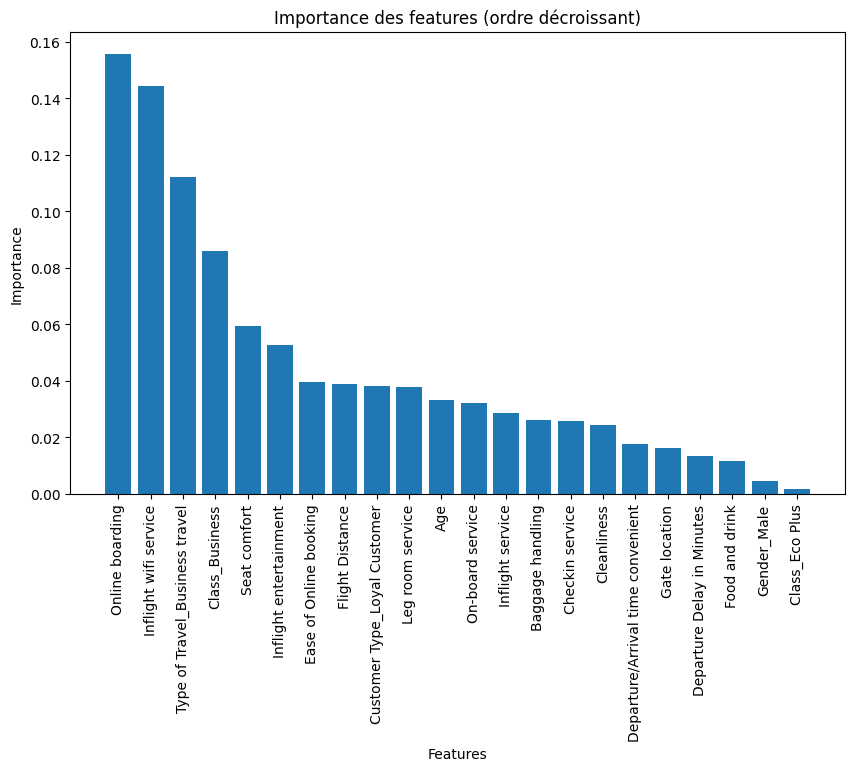

In [98]:
df=pd.read_csv("airline_satisfaction_final.csv", index_col = 0)

y = df.satisfaction_satisfied.values

X = df[['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Gender_Male',
       'Customer Type_Loyal Customer', 'Type of Travel_Business travel',
       'Class_Business', 'Class_Eco Plus',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

forest = RandomForestClassifier(n_estimators = 100, random_state=0)

forest.fit(X_train, y_train)
forest.predict(X_test)

import matplotlib.pyplot as plt

importances = forest.feature_importances_
indices = (-importances).argsort()
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center') 
plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Importance des features (ordre décroissant)')
plt.show()

## PCA

In [99]:
from sklearn.decomposition import PCA

In [100]:
pca = PCA(n_components=2)
pca.fit(X)
print(f"ratio variance expliquée : {pca.explained_variance_ratio_}")
print(f"valeurs pca : {pca.singular_values_}")
X_pca = pca.transform(X)
print("Original shape :{}".format(str(X.shape)))
print("Reduced shape :{}".format(str(X_pca.shape)))

ratio variance expliquée : [0.21297042 0.12804819]
valeurs pca : [235.92235685 182.93473445]
Original shape :(129880, 22)
Reduced shape :(129880, 2)


In [111]:
explained_variance = pca.explained_variance_ratio_

for i, var_explained in enumerate(explained_variance):
    print(f"Composante principale {i+1}: {var_explained:.2%} de la variance totale")

# Initialisation des variables pour stocker les indices et valeurs maximales
max_coeff_indices = []
max_coeff_values = []

# Parcours des coefficients des composantes principales
for i, coeff in enumerate(coefficients):
    # Trouver l'indice et la valeur maximale dans les coefficients
    max_index = np.argmax(np.abs(coeff))
    max_value = coeff[max_index]
    
    # Ajouter l'indice et la valeur maximale à la liste respective
    max_coeff_indices.append(max_index)
    max_coeff_values.append(max_value)

# Afficher les résultats
for i, (index, value) in enumerate(zip(max_coeff_indices, max_coeff_values)):
    feature_name = X.columns
    print(f"Pour la composante principale {i+1}, le coefficient le plus élevé est {value} pour la caractéristique '{feature_name[index]}'")

Composante principale 1: 21.30% de la variance totale
Composante principale 2: 12.80% de la variance totale
Composante principale 3: 12.30% de la variance totale
Composante principale 4: 8.87% de la variance totale
Composante principale 5: 8.53% de la variance totale
Composante principale 6: 7.74% de la variance totale
Composante principale 7: 4.12% de la variance totale
Composante principale 8: 3.49% de la variance totale
Composante principale 9: 2.98% de la variance totale
Composante principale 10: 2.49% de la variance totale
Composante principale 11: 2.36% de la variance totale
Composante principale 12: 1.87% de la variance totale
Composante principale 13: 1.80% de la variance totale
Composante principale 14: 1.68% de la variance totale
Composante principale 15: 1.48% de la variance totale
Composante principale 16: 1.34% de la variance totale
Composante principale 17: 1.16% de la variance totale
Composante principale 18: 1.11% de la variance totale
Composante principale 19: 1.01% de

In [113]:
cumulative_variance_ratio = np.cumsum(explained_variance)
num_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
print(f"Nombre de composantes pour atteindre au moins 80% de la variance expliquée: {num_components_80}")

# Identifiez les caractéristiques inutiles en fonction des coefficients des premières composantes principales
features_to_drop = []
for i in range(num_components_80):
    max_index = max_coeff_indices[i]
    features_to_drop.append(feature_name[max_index])


sorted_features_to_drop = sorted(features_to_drop)
print("Caractéristiques potentiellement inutiles triées par ordre croissant:", sorted_features_to_drop)

Nombre de composantes pour atteindre au moins 80% de la variance expliquée: 9
Caractéristiques potentiellement inutiles triées par ordre croissant: ['Baggage handling', 'Class_Business', 'Class_Eco Plus', 'Class_Eco Plus', 'Customer Type_Loyal Customer', 'Ease of Online booking', 'Gender_Male', 'Gender_Male', 'Online boarding']


In [103]:
explained_variance = pca.explained_variance_ratio_

for i, var_explained in enumerate(explained_variance):
    print(f"Feature {i+1}: {var_explained:.2%} de la variance totale")

Feature 1: 21.30% de la variance totale
Feature 2: 12.80% de la variance totale


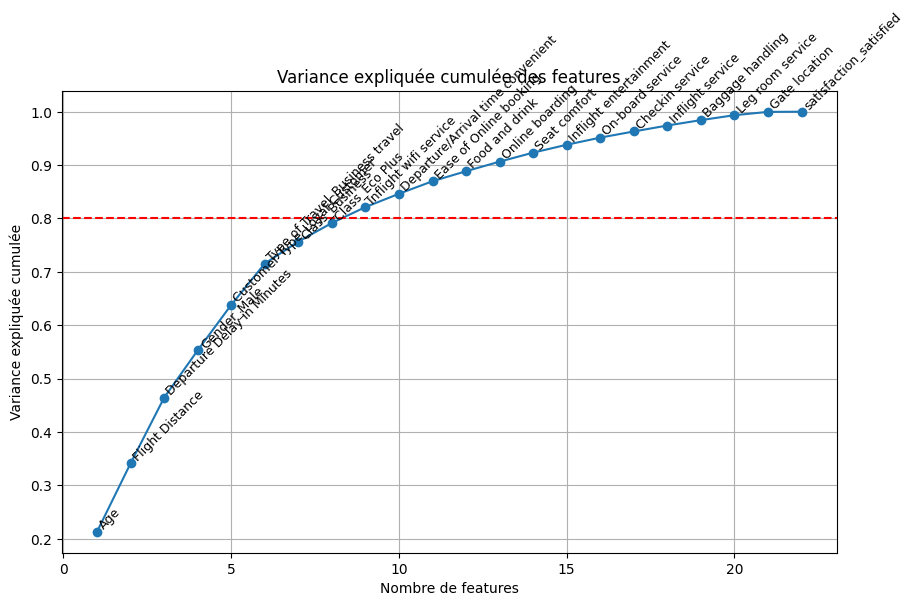

In [101]:
import numpy as np
import matplotlib.pyplot as plt

# Supposons que X soit votre jeu de données avec les features
# Remplacez X par votre propre jeu de données
# Assurez-vous que X est une matrice où les colonnes représentent les features
# et les lignes représentent les observations.

# Supposons que vous ayez un DataFrame pandas appelé df
# Assurez-vous que df contient vos données avec les noms de colonnes corrects

# Calculer la matrice de covariance
cov_matrix = np.cov(X, rowvar=False)

# Calculer les valeurs propres et les vecteurs propres
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Trier les valeurs propres par ordre décroissant et obtenir les indices
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]

# Réorganiser les noms des colonnes de df selon l'ordre des valeurs propres triées
sorted_column_names = df.columns[sorted_indices]

# Calculer la variance expliquée cumulée
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

# Tracer la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Nombre de features')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée des features')
plt.grid(True)

# Afficher le nom de la feature correspondant à chaque plot
for i, var_ratio in enumerate(cumulative_variance_ratio):
    plt.text(i + 1, var_ratio, sorted_column_names[i], fontsize=9, ha='left', va='bottom', rotation=45)

# Tracer une ligne horizontale rouge à 0.8 de variance expliquée cumulée
plt.axhline(y=0.8, color='r', linestyle='--')

plt.show()


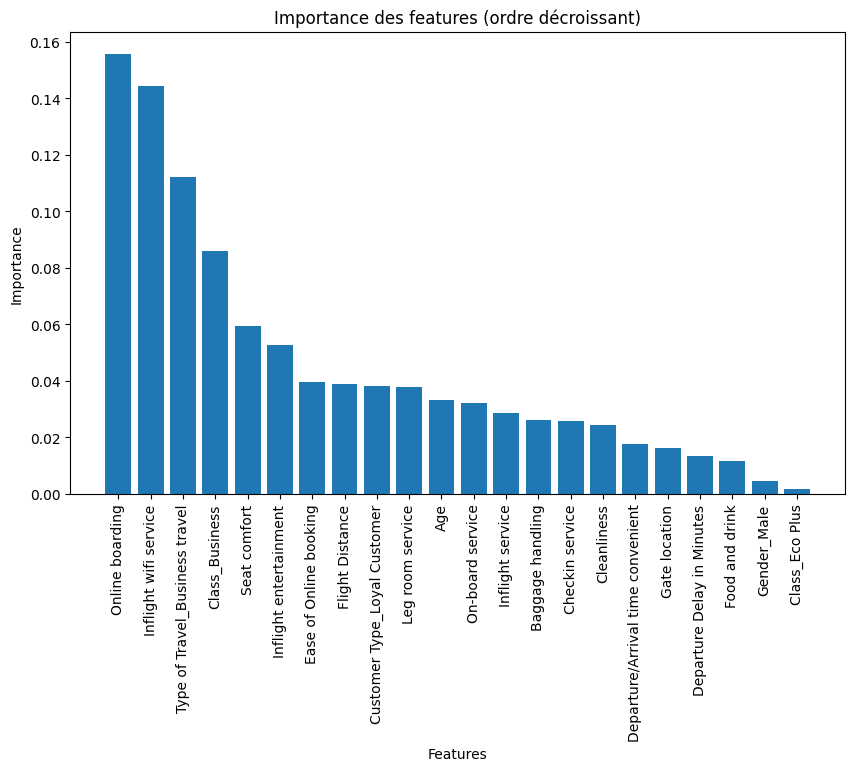

In [102]:
forest = RandomForestClassifier(n_estimators = 100, random_state=0)

forest.fit(X_train, y_train)
forest.predict(X_test)

import matplotlib.pyplot as plt

importances = forest.feature_importances_
indices = (-importances).argsort()
sorted_features = [X.columns[i] for i in indices]
sorted_importances = importances[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_features)), sorted_importances, align='center') 
plt.xticks(range(len(sorted_features)), sorted_features, rotation='vertical')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.title('Importance des features (ordre décroissant)')
plt.show()

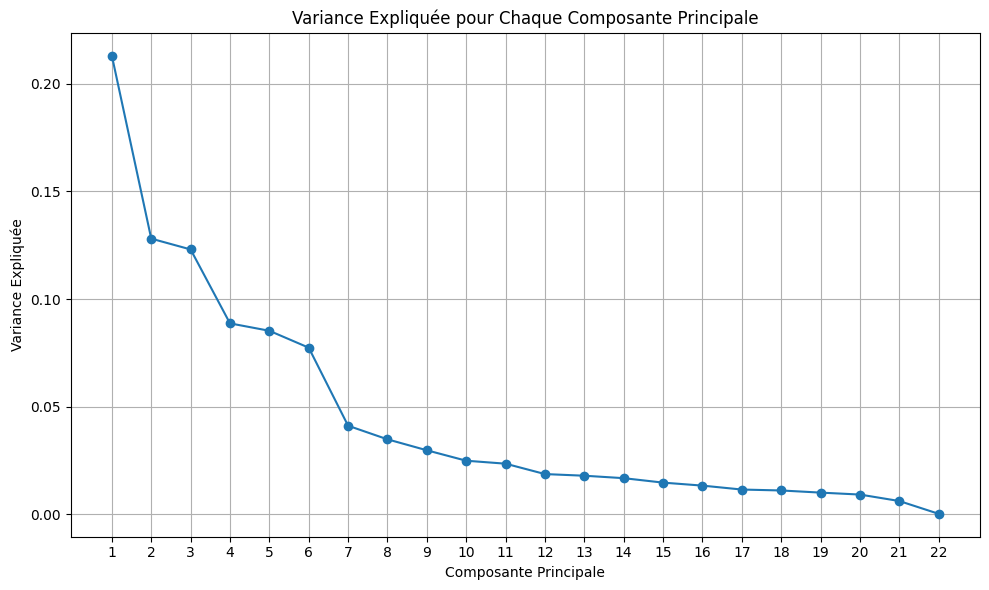

In [117]:
# Calculer la variance expliquée pour chaque composante principale
explained_variance = pca.explained_variance_ratio_

# Tracer le graphe
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='-')
plt.xlabel('Composante Principale')
plt.ylabel('Variance Expliquée')
plt.title('Variance Expliquée pour Chaque Composante Principale')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

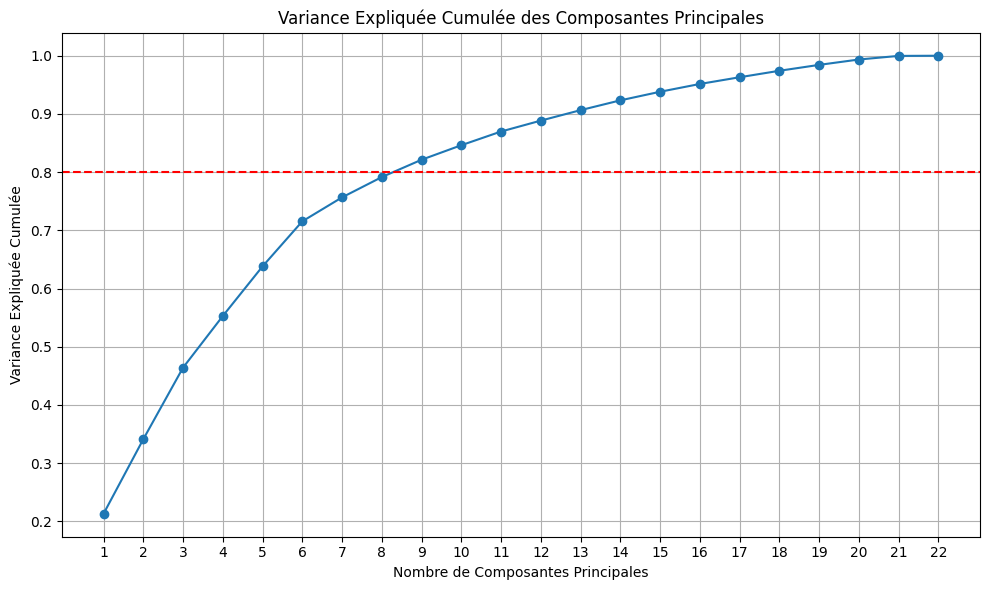

In [120]:
explained_variance = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance)

# Tracer le graphe de la variance expliquée cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=0.8, color='r', linestyle='--')  # Ajouter la ligne horizontale à 0.8
plt.xlabel('Nombre de Composantes Principales')
plt.ylabel('Variance Expliquée Cumulée')
plt.title('Variance Expliquée Cumulée des Composantes Principales')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()